In [25]:
from collections import defaultdict, Counter
import urllib

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from sklearn import (preprocessing, manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection, cluster, metrics)

import scipy.cluster.hierarchy
import scipy.spatial.distance

from sklearn.metrics import pairwise_distances

import seaborn as sns
import pandas as pd

%matplotlib inline

##  Classification

* In case of classification, predicted dependent variable is categoric, denoting a class

In classification problems we distinguish:
* binary classification (predicting on of the two classes)
* multiclass or multivariate classification (predicting one of more than two classes)
* multilabel classification (predicting several class labels out of more than two classes)


## Clustering
In clustering we attempt to group observations in such a way that observations assigned to the same cluster are more similar to each other than to observations in other clusters. Usually, the number of categories (clusters) is also unknown.


![ML Map](http://scikit-learn.org/stable/_static/ml_map.png)

[0 1 2 ..., 8 9 8]
(1797, 64)
(1797,)
Total 1797 examples


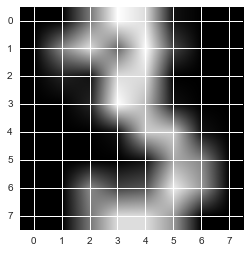

In [37]:
# Example of a classification problem:

digits = datasets.load_digits()

# X - how digits are handwritten
X = digits['data']

# y - what these digits actually are
y = digits['target']
print(y)

print(X.shape)
print(y.shape)
print("Total 1797 examples")

plt.imshow(X[3].reshape((8,8)),  cmap=plt.cm.gray)
plt.show()


* We can consider classification of digits as a multiclass classification or as 10 binary One-vs-All classification problems

* In case of multilabel classification we can identify more than one class, e.g. for a handwritten number (12) identify labels 1 and 2.


## Evalutaion of binary classifiers

### Positives and Negatives

* True Positive - we predicted "+" and the true class is "+"
* True Negative - we predicted "-" and the true class is "-"
* False Positive - we predicted "+" and the true class is "-" (Type I error)
* False Negative - we predicted "-" and the true class is "+" (Type II error)
(see also Statistical Tests of Significance#Type I and Type II Errors)

* Positive predictive value (or precision)
P = TP/TP+FP
Negative predictive value

* True Positive Rate (also Sensitivity or Recall)
Fraction of positive examples correctly classified
tpr = TP/TP+FN

* False Positive Rate (also Fall-Out)
Fraction of negative examples incorrectly classified
fpr = FP/FP+TN

### Sensitivity and Specificity


### Receiver Operator Curves

* 1 - Specificity vs 1 - Sensitivity
* There's a trade-off between them


### Precision and Recall

Precision and Recall are quality metrics used across many domains. Originally it's from Information Retrieval, also used in Machine Learning.

* Precision: % of relevant documents in the result
* Recall: % of retrieved relevant documents
* F-measure is a combination of precision and recall

![PR2](https://wikimedia.org/api/rest_v1/media/math/render/svg/feba1026013cff9ffe62933267f981c2caa4bddb)



### Precision/Recall Curves

* If we retrieve more document, we improve recall (if return all docs, R=1)
* if we retrieve fewer documents, we improve precision, but reduce recall, so there's a trade-off between them

![PR](https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/440px-Precisionrecall.svg.png)


In [38]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

# Import some data to play with
# iris = datasets.load_iris()
# X = iris.data
# y = iris.target

# Binarize the output
print(y)
y_bin = label_binarize(y, classes=[0,1,2,3,4,5,6,7,8,9])
print(y_bin)
n_classes = y_bin.shape[1]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=.5)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


[0 1 2 ..., 8 9 8]
[[1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 1 0]
 [0 0 0 ..., 0 0 1]
 [0 0 0 ..., 0 1 0]]


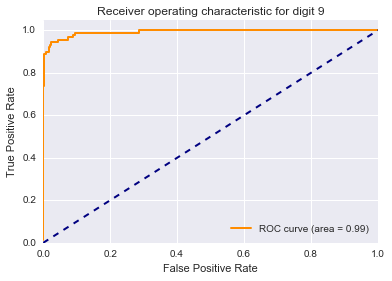

In [45]:
plt.figure()
lw = 2
category = 9
plt.plot(fpr[category], tpr[category], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[category])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for digit ' + str(category))
plt.legend(loc="lower right")
plt.show()

In [62]:
# classification_report

# Unsupervised classification methods


## Clustering

In clustering we attempt to group observations in such a way that observations assigned to the same cluster are more similar to each other than to observations in other clusters.

Although labels may be known, clustering is usually performed on unlabeled data as a step in exploratory data analysis.

The best method to use will vary developing on the particular problem.

## Evaluation of clustering

* How to measure success of clustering without true class labels?
* How to find the optimal number of clusters?
* Which clustering method to choose with what parameters?


### Model evaluation

Several approaches have been developed for evaluating clustering models but are generally limited in requiring the true clusters to be known. In the general use case for clustering this is not known with the goal being exploratory. 

Ultimately, a model is just a tool to better understand the structure of our data. If we are able to gain insight from using a clustering algorithm then it has served its purpose.

[The metrics](http://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation) available are Adjusted Rand Index, Mutual Information based scores, Homogeneity, completeness, v-measure, and silhouette coefficient. Of these, only the silhouette coefficient does not require the true clusters to be known.

Although the silhouette coefficient can be useful it takes a very similar approach to k-means, favoring convex clusters over more complex, equally valid, clusters.

### How to determine number of clusters

One important use for the model evaluation algorithms is in choosing the number of clusters. The clustering algorithms take as parameters either the number of clusters to partition a dataset into or other scaling factors that ultimately determine the number of clusters. It is left to the user to determine the correct value for these parameters.

As the number of clusters increases the fit to the data will always improve until each point is in a cluster by itself. As such, classical optimization algorithms searching for a minimum or maximum score will not work. Often, the goal is to find an inflection point.

If the cluster parameter is too low adding an additional cluster will have a large impact on the evaluation score. The gradient will be high at numbers of clusters less than the true value. If the cluster parameter is too high adding an additional cluster will have a small impact on the evaluation score. The gradient will be low at numbers of clusters higher than the true value.

At the correct number of clusters the gradient should suddenly change, this is an inflection point.

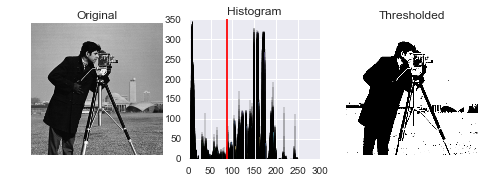

In [63]:
import matplotlib
import matplotlib.pyplot as plt

from skimage.data import camera
from skimage.filters import threshold_otsu

matplotlib.rcParams['font.size'] = 9

image = camera()
thresh = threshold_otsu(image)
binary = image > thresh

#fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(8, 2.5))
fig = plt.figure(figsize=(8, 2.5))
ax1 = plt.subplot(1, 3, 1, adjustable='box-forced')
ax2 = plt.subplot(1, 3, 2)
ax3 = plt.subplot(1, 3, 3, sharex=ax1, sharey=ax1, adjustable='box-forced')

ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Original')
ax1.axis('off')

ax2.hist(image)
ax2.set_title('Histogram')
ax2.axvline(thresh, color='r')

ax3.imshow(binary, cmap=plt.cm.gray)
ax3.set_title('Thresholded')
ax3.axis('off')

plt.show()

### Different clustering algorithms

![Cluster comparison](files/plot_cluster_comparison_001.png)
[Cluster comparison](http://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html)


The following algorithms are provided by [scikit-learn](http://scikit-learn.org/stable/modules/clustering.html)

* K-means
* Affinity propagation
* Mean Shift
* Spectral clustering
* Ward
* Agglomerative Clustering
* DBSCAN
* Birch


**K-means** clustering divides samples between clusters by attempting to minimize the within-cluster sum of squares. It is an iterative algorithm repeatedly updating the position of the centroids (cluster centers), re-assigning samples to the best cluster and repeating until an optimal solution is reached. The clusters will depend on the starting position of the centroids so k-means is often run multiple times with random initialization and then the best solution chosen.

[Affinity Propagation](http://science.sciencemag.org/content/315/5814/972) operates by passing messages between the samples updating a record of the exemplar samples. These are samples that best represent other samples. The algorithm functions on an affinity matrix that can be eaither user supplied or computed by the algorothm. Two matrices are maintained. One matrix records how well each sample represents other samples in the dataset. When the algorithm finishes the highest scoring samples are chosen to represent the clusters. The second matrix records which other samples best represent each sample so that the entire dataset can be assigned to a cluster when the algorithm terminates.

[Mean Shift](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.76.8968&rep=rep1&type=pdf) iteratively updates candidate centroids to represent the clusters. The algorithm attempts to find areas of higher density.

**Spectral clustering** operates on an affinity matrix that can be user supplied or computed by the model. The algorithm functions by minimizing the value of the links cut in a graph created from the affinity matrix. By focusing on the relationships between samples this algorithm performs well for non-convex clusters.

**Agglomerative clustering** starts all the samples in their own cluster and then progressively joins clusters together minimizing some performance measure. In addition to minimizing the variance as seen with Ward other options are, 1) minimizing the average distance between samples in each cluster, and 2) minimizing the maximum distance between observations in each cluster.

**Ward** is a type of agglomerative clustering using minimization of the within-cluster sum of squares to join clusters together until the specified number of clusters remain.

**DBSCAN** is another algorithm that attempts to find regions of high density and then expands the clusters from there.

[Birch](http://scikit-learn.org/stable/modules/clustering.html#birch) is a tree based clustering algorithm assigning samples to nodes on a tree

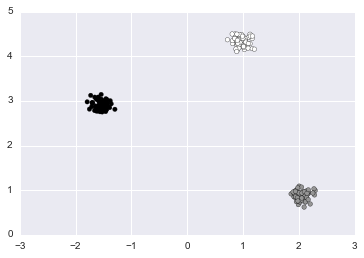

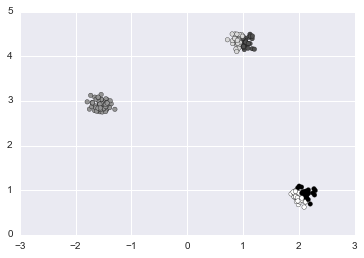

In [64]:
from sklearn import cluster, datasets

dataset, true_labels = datasets.make_blobs(n_samples=200, n_features=2, random_state=0,
                                           centers=3, cluster_std=0.1)

fig, ax = plt.subplots(1,1)
ax.scatter(dataset[:,0], dataset[:,1], c=true_labels)
plt.show()

# Clustering algorithm can be used as a class
means = cluster.KMeans(n_clusters=5)
prediction = means.fit_predict(dataset)

fig, ax = plt.subplots(1,1)
ax.scatter(dataset[:,0], dataset[:,1], c=prediction)
plt.show()

In [65]:
## Distances and similarities

Euclidean
 [[ 0.          1.41421356]
 [ 1.41421356  0.        ]]

Manhattan
 [[ 0.  2.]
 [ 2.  0.]]
[[ 6.  0.  1.]
 [ 2.  1.  3.]]

Euclidean
 [[ 0.          4.58257569]
 [ 4.58257569  0.        ]]

Cosine
 [[ 0.          0.21663202]
 [ 0.21663202  0.        ]]
Manhattan
 [[ 0.  7.]
 [ 7.  0.]]
Correlation is invariant
 [[ 0.          0.84445725]
 [ 0.84445725  0.        ]]


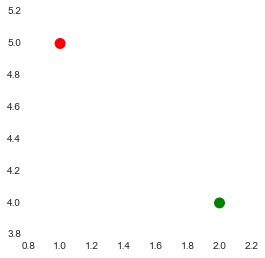

In [66]:
X = np.array([[1, 5], 
              [2, 4]])


fig = plt.figure()
ax = fig.add_subplot(111)
ax.patch.set_facecolor('white')
ax.scatter(X[...,0], X[...,1], c=("red", "green"), s=120, edgecolors='none')
ax.set_autoscale_on(False)
ax.axis('square')

D = pairwise_distances(X, metric = 'euclidean')
print("Euclidean\n", D)
print()


D = pairwise_distances(X, metric = 'manhattan')
print("Manhattan\n", D)


X = np.array([[6, 0.0, 1.0], 
              [2, 1, 3.0]])

print(X)
print()

D = pairwise_distances(X, metric = 'euclidean')
print("Euclidean\n", D)
print()

D = pairwise_distances(X + 1, metric = 'cosine')
print("Cosine\n", D)

D = pairwise_distances(X, metric = 'manhattan')
print("Manhattan\n", D)

D = pairwise_distances(X + 10, metric = 'correlation')
print("Correlation is invariant\n", D)

Minkowsky distance:  $\left(\sum_{i=1}^n |x_i-y_i|^p\right)^{1/p}$

for Euclidean: p=2

for Manhattan: p=1

In [67]:
## Binary data

In [68]:
binary = np.array([[0, 0, 1, 1, 1, 0, 0], 
                   [0, 1, 1, 1, 0, 0, 0]])

print(binary)

D = pairwise_distances(binary, metric = 'jaccard')
print("\nJaccard\n", D)

D = pairwise_distances(binary, metric = 'hamming')
print("\nHamming\n", D)

[[0 0 1 1 1 0 0]
 [0 1 1 1 0 0 0]]

Jaccard
 [[ 0.   0.5]
 [ 0.5  0. ]]

Hamming
 [[ 0.          0.28571429]
 [ 0.28571429  0.        ]]


/Users/agoncear/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to bool by check_pairwise_arrays.
  warnings.warn(msg, _DataConversionWarning)


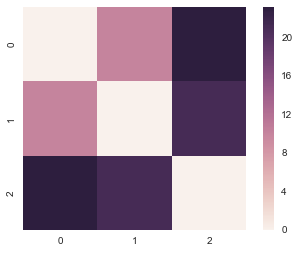

In [69]:
X = np.array([[0, 0, 0, 0], [5, 5, 5, 5], [5, 4, -10, 20]])

# Pairwise distances
D = pairwise_distances(X, metric = 'euclidean')

sns.heatmap(D, square=True)
plt.show()

## Synthetic dataset

[[ -0.63762777   4.09104705   1.15980096   1.28456616]
 [  9.48153019  -1.35453059   6.19086716   1.28447156]
 [ -2.69205385   3.81870875  -0.78259334   6.29921633]
 [  2.20656076   5.50616718   1.6679407    0.59536091]
 [  9.28375523  -0.54529913   5.96141285   0.97988776]
 [ -2.19936446   2.5583291   -2.06140206   6.10917741]
 [ -2.03770915   1.73725008  -1.276438     8.26379189]
 [ -0.07228289   2.88376939   0.34899733   2.84843906]
 [ -0.38750333   1.68305644  -0.84591413   7.15064992]
 [  8.1001318   -0.38754844   5.42088178  -0.16955642]
 [ -1.34947787   2.51610133  -2.87845412   8.29824227]
 [  8.57868735  -2.48080416   5.39934721   2.42716212]
 [ -2.43420238   2.96982766  -0.51916521   7.96444293]
 [ 11.15640591  -3.67892868   4.56401576   1.5472951 ]
 [ -0.03865182   4.81377144  -0.0694762    7.65553518]
 [  3.2460247    2.84942165   2.10102604   0.71047981]
 [ -2.59765663   3.97233399  -1.65143272   9.05790509]
 [  9.64968074  -3.43057041   6.13273894   1.90428429]
 [  8.4120

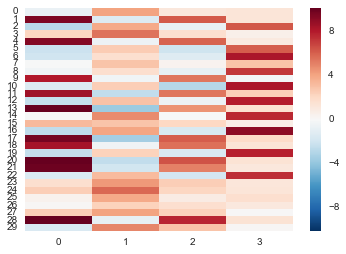

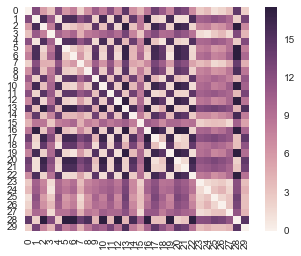

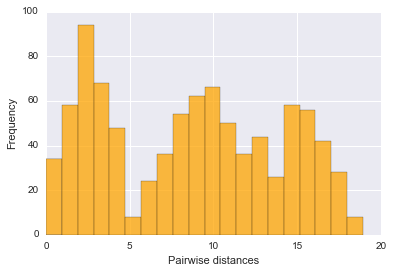

In [70]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=30, centers=3, n_features=4, random_state=0)
print(X)
sns.heatmap(X, robust=True, square=False, yticklabels=True, xticklabels=True, cbar=True)
plt.show()

D = pairwise_distances(X, metric='euclidean', n_jobs=-1)

sns.heatmap(D, robust=True, square=True, yticklabels=True, xticklabels=True, cbar=True)
plt.show()

plt.hist(np.hstack(D), 20, facecolor='orange', alpha=0.75)
plt.xlabel('Pairwise distances')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

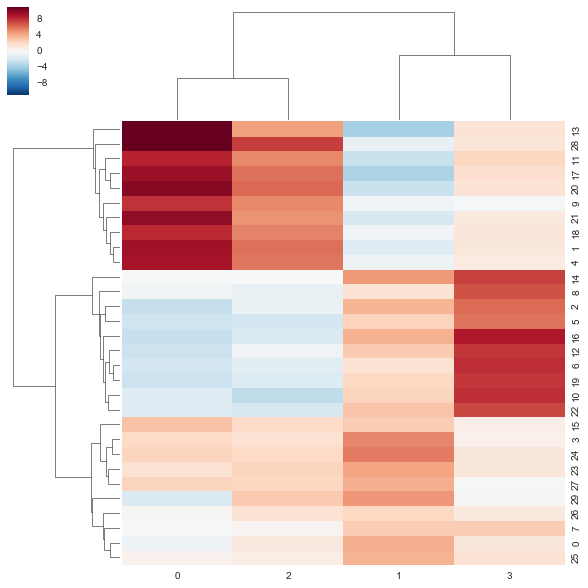

In [71]:
# Clustering is often used as an accessory
sns.clustermap(X)  # requires fastcluster package:  !pip install fastcluster
plt.show()

In [73]:
from sklearn.metrics.cluster import v_measure_score, adjusted_rand_score

# Clustering 4D dataset

kmeans = cluster.KMeans(n_clusters=3, random_state=0).fit(X)
print(y)
print(kmeans.labels_)
print("V measure", v_measure_score(y, kmeans.labels_))
print("Adj. Rand score", adjusted_rand_score(y, kmeans.labels_))


[0 2 1 0 2 1 1 0 1 2 1 2 1 2 1 0 1 2 2 1 2 2 1 0 0 0 0 0 2 0]
[2 1 0 2 1 0 0 2 0 1 0 1 0 1 0 2 0 1 1 0 1 1 0 2 2 2 2 2 1 2]
V measure 1.0
Adj. Rand score 1.0


{2: 0.64712364194048377,
 3: 0.69141643243019646,
 4: 0.59775805045292274,
 5: 0.44083350869636689,
 6: 0.43050627878760894,
 7: 0.32641206582551507,
 8: 0.25027388874853307,
 9: 0.26871161863825316,
 10: 0.27600766040295627}


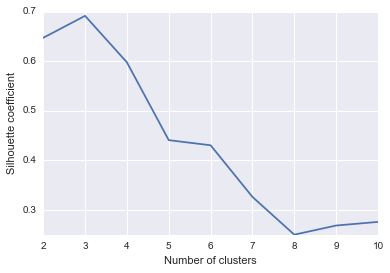

In [74]:
from sklearn.metrics.cluster import silhouette_score
import pprint

def calc_silhouette(data, n):
    """Runs Kmeans clustering and returns average silhouette coefficient"""    
    kmeans = cluster.KMeans(n_clusters=n).fit(data)
    score = silhouette_score(data, kmeans.labels_, metric='l2')
    return score

scores = {n: calc_silhouette(X, n) for n in range(2, 11)}
pprint.pprint(scores)
plt.plot(list(scores.keys()), list(scores.values()))
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette coefficient')
plt.show()

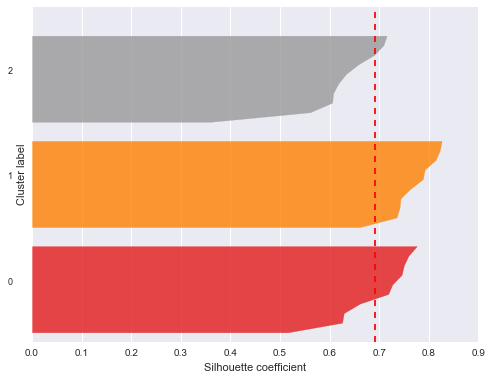

In [75]:
from sklearn.metrics.cluster import silhouette_samples

n_clusters = 3

# Compute the silhouette scores for each sample
kmeans = cluster.KMeans(n_clusters=n_clusters).fit(X)
lbls = kmeans.labels_
values = silhouette_samples(X, lbls)

g, ax = plt.subplots(figsize=(8, 6))
color_scale = np.linspace(0, 1, n_clusters)
y_lower = 1
for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to cluster i
    v = sorted(values[lbls == i])
    cluster_size = len(v)
    y_upper = y_lower + cluster_size

    # color mapping:
    c = plt.cm.Set1(color_scale[i])
    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, v, facecolor=c, edgecolor=c, alpha=0.8)

    # Label the silhouette plots with their cluster numbers at the middle
    ax.text(-0.05, y_lower + 0.5 * cluster_size, str(i))
    y_lower = y_upper + 1

ax.set_xlabel("Silhouette coefficient")
ax.set_ylabel("Cluster label")

# Average silhouette score
score = silhouette_score(X, lbls, metric='l2')
ax.axvline(x=score, color="red", linestyle="--")
ax.set_yticks([])
plt.show()


## Example: Gene expression in Breast Cancer (BRCA)

In [76]:
from pathlib import Path

ICGC_API = 'https://dcc.icgc.org/api/v1/download?fn=/release_18/Projects/BRCA-US/'

# clinical_fname = 'clinical.BRCA-US.tsv.gz'
# if not Path(clinical_fname).is_file():
#     urllib.request.urlretrieve(ICGC_API + 'clinical.BRCA-US.tsv.gz', clinical_fname);

expression_fname = 'protein_expression.BRCA-US.tsv.gz'
if not Path(expression_fname).is_file():
    urllib.request.urlretrieve(ICGC_API + 'protein_expression.BRCA-US.tsv.gz', expression_fname);

In [77]:
# C = np.genfromtxt(clinical_fname, delimiter='\t', dtype='object', 
#                   skip_header=1, usecols=(0, 17, 19))
# E = np.genfromtxt(expression_fname, delimiter='\t', dtype=("|U10", "|U10", "|U10", float), 
#                   skip_header=1, usecols=(0, 2, 7, 10))

E = pd.read_csv(expression_fname, delimiter='\t')

In [78]:
E.head()

,icgc_donor_id,project_code,icgc_specimen_id,icgc_sample_id,submitted_sample_id,analysis_id,antibody_id,gene_name,gene_stable_id,gene_build_version,normalized_expression_level,verification_status,verification_platform,platform,experimental_protocol,raw_data_repository,raw_data_accession
0,DO4143,BRCA-US,SP8807,SA11426,TCGA-A1-A0SK-01A-21-A13A-20,10694,PAI-1,SERPINE1,NaN,NaN,1.769954,not tested,NaN,M.D. Anderson Reverse Phase Protein Array Core,MDA_RPPA_Core http://tcga-data.nci.nih.gov/tcg...,TCGA,TCGA-A1-A0SK-01A-21-A13A-20
1,DO4143,BRCA-US,SP8807,SA11426,TCGA-A1-A0SK-01A-21-A13A-20,10694,ARID1A,ARID1A,NaN,NaN,0.619539,not tested,NaN,M.D. Anderson Reverse Phase Protein Array Core,MDA_RPPA_Core http://tcga-data.nci.nih.gov/tcg...,TCGA,TCGA-A1-A0SK-01A-21-A13A-20
2,DO4143,BRCA-US,SP8807,SA11426,TCGA-A1-A0SK-01A-21-A13A-20,10694,mTOR_pS2448,FRAP1,NaN,NaN,-0.538637,not tested,NaN,M.D. Anderson Reverse Phase Protein Array Core,MDA_RPPA_Core http://tcga-data.nci.nih.gov/tcg...,TCGA,TCGA-A1-A0SK-01A-21-A13A-20
3,DO4143,BRCA-US,SP8807,SA11426,TCGA-A1-A0SK-01A-21-A13A-20,10694,ASNS,ASNS,NaN,NaN,1.156044,not tested,NaN,M.D. Anderson Reverse Phase Protein Array Core,MDA_RPPA_Core http://tcga-data.nci.nih.gov/tcg...,TCGA,TCGA-A1-A0SK-01A-21-A13A-20
4,DO4143,BRCA-US,SP8807,SA11426,TCGA-A1-A0SK-01A-21-A13A-20,10694,EGFR,EGFR,NaN,NaN,0.120138,not tested,NaN,M.D. Anderson Reverse Phase Protein Array Core,MDA_RPPA_Core http://tcga-data.nci.nih.gov/tcg...,TCGA,TCGA-A1-A0SK-01A-21-A13A-20


In [79]:
donors = set(E['icgc_donor_id'])
genes = set(E['gene_name'])
print(len(donors))
print(len(genes))

298
115


In [ ]:
donor2id = {donor: i for i, donor in enumerate(donors)}
id2donor = dict(zip(donor2id.values(), donor2id.keys()))

gene2id = {gene: i for i, gene in enumerate(genes)}
id2gene = dict(zip(gene2id.values(), gene2id.keys()))

data = np.zeros((len(donors), len(genes)))
for i in range(len(E)):
    data[donor2id[E.loc[i, 'icgc_donor_id']], gene2id[E.loc[i, 'gene_name']]] = float(E.loc[i, 'normalized_expression_level'])

In [ ]:
# normalize data
# data = preprocessing.Normalizer().fit_transform(data)
data = preprocessing.MinMaxScaler().fit_transform(data)

In [ ]:
print(data)
sns.heatmap(data, robust=True, square=False, yticklabels=False, xticklabels=False, cbar=True)
plt.show()

In [ ]:
sns.clustermap(data, xticklabels=True, yticklabels=False)
plt.show()

## Plot dendrogram and a heatmap

In [ ]:
def clean_axis(ax):
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    for sp in ax.spines.values():
        sp.set_visible(False)

# Figure is a grid with two parts  1 : 4
fig = plt.figure(figsize=(14, 10))
grid = gridspec.GridSpec(1, 2, wspace=.01, hspace=0., width_ratios=[0.25, 1])

Y = scipy.cluster.hierarchy.linkage(data, method='ward', metric='euclidean')
# also look up:
# method = [ average (UPGMA), complete, single, ward ]
# and metric

# Dendrogram
ax = fig.add_subplot(grid[0,0])
denD = scipy.cluster.hierarchy.dendrogram(Y, orientation='left', link_color_func=lambda k: 'black')
clean_axis(ax)

# Heatmap
ax = fig.add_subplot(grid[0,1])
D = pairwise_distances(data, metric = 'euclidean')
D = D[denD['leaves'], :][:, denD['leaves']]
axi = ax.imshow(D, interpolation='nearest', aspect='equal', origin='lower', cmap='RdBu') 
clean_axis(ax)

# Legend for heatmap
cb = fig.colorbar(axi, fraction=0.046, pad=0.04, aspect=10) 
cb.set_label('Distance', fontsize=20)


## Exercises
 * In breast cancer example change clustering methods from Kmeans to DBSCAN and AgglomerativeClustering
 * In breast cancer example experiment with different combinations of linkage and metric in AgglomerativeClustering
 